<a href="https://colab.research.google.com/github/samiha-mahin/Data-Analysis/blob/main/Handling_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Median Imputation
For imputing numerical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [9]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [10]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [11]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [12]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [13]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [14]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

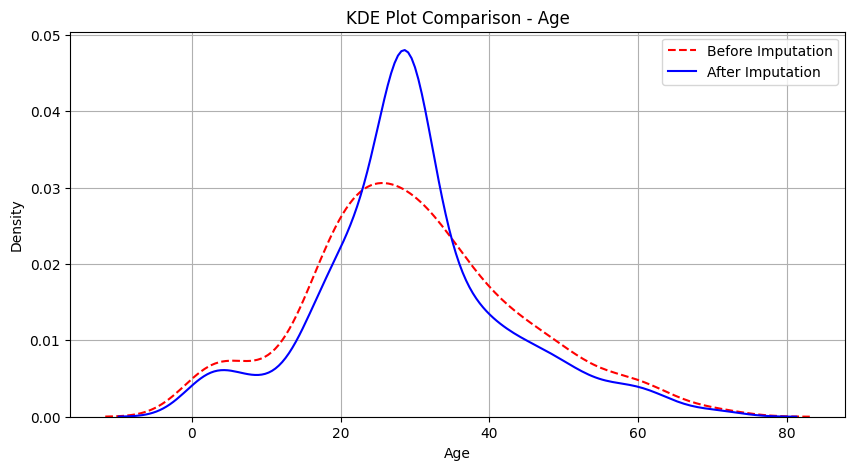

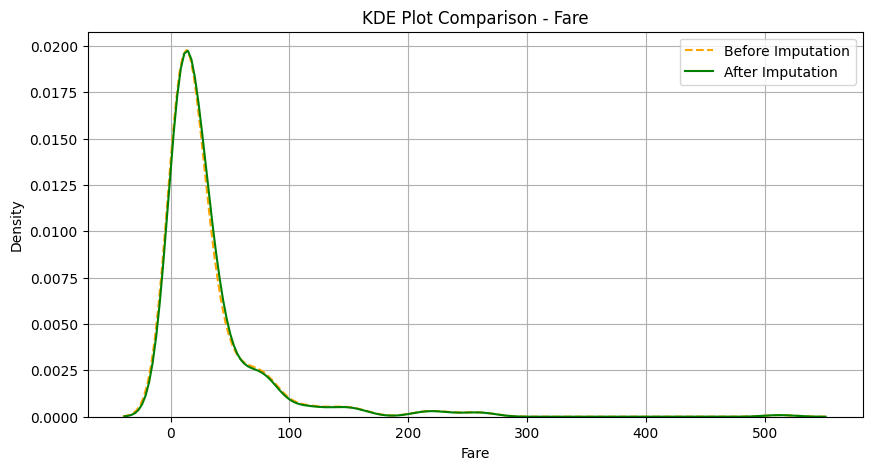

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Re-split to get raw training data before transformation
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 2: Create DataFrame for transformed X_train
X_train_transformed = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family'])  # Keep order as per transform

# Step 3: Plot KDE for 'Age' before and after
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train_raw['Age'], label='Before Imputation', color='red', linestyle='--')
sns.kdeplot(X_train_transformed['Age'], label='After Imputation', color='blue')
plt.title('KDE Plot Comparison - Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Plot KDE for 'Fare' before and after
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train_raw['Fare'], label='Before Imputation', color='orange', linestyle='--')
sns.kdeplot(X_train_transformed['Fare'], label='After Imputation', color='green')
plt.title('KDE Plot Comparison - Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Arbitrary-Value Imputation


### 🌸 Arbitrary-Value Imputation:

It means **filling missing data with a fixed value** that you choose — like `0`, `-1`, or `999`.

You don’t calculate anything like mean or median. You just **pick a number** to put in place of missing values.

---

### 💡 Example:

| Age |
| --- |
| 22  |
| NaN |
| 35  |
| NaN |

If you choose **999** as the arbitrary value, it becomes:

| Age |
| --- |
| 22  |
| 999 |
| 35  |
| 999 |

---

### ✅ Why use it?

To clearly mark missing values with a special number.




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [20]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [21]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

imputer1 = SimpleImputer(strategy='constant',fill_value=99)

imputer2 = SimpleImputer(strategy='constant',fill_value=999)
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [22]:
trf.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [23]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [24]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [25]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [26]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])